### Setting

In [1]:
import csv 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 讀取資料

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(600000, 25)

In [4]:
train.head(10)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
5,5,0.0,NaN,1.0,T,N,Red,Triangle,Lion,China,...,05afc0f8b,2.0,Expert,Hot,b,Q,wa,3.0,4.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,...,NaN,1.0,Novice,Boiling Hot,c,N,mX,6.0,3.0,0
9,9,0.0,0.0,NaN,F,Y,Red,Polygon,Hamster,Finland,...,79b29d54c,3.0,Contributor,Lava Hot,n,I,OZ,1.0,8.0,1


In [5]:
title = train.columns

In [6]:
title

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [7]:
train.dtypes

id          int64
bin_0     float64
bin_1     float64
bin_2     float64
bin_3      object
bin_4      object
nom_0      object
nom_1      object
nom_2      object
nom_3      object
nom_4      object
nom_5      object
nom_6      object
nom_7      object
nom_8      object
nom_9      object
ord_0     float64
ord_1      object
ord_2      object
ord_3      object
ord_4      object
ord_5      object
day       float64
month     float64
target      int64
dtype: object

#### Null值 計算

In [8]:
train.isna().sum()

id            0
bin_0     17894
bin_1     18003
bin_2     17930
bin_3     18014
bin_4     18047
nom_0     18252
nom_1     18156
nom_2     18035
nom_3     18121
nom_4     18035
nom_5     17778
nom_6     18131
nom_7     18003
nom_8     17755
nom_9     18073
ord_0     18288
ord_1     18041
ord_2     18075
ord_3     17916
ord_4     17930
ord_5     17713
day       17952
month     17988
target        0
dtype: int64

### 重複值 計算

In [9]:
for i in range(0,25):
    print(title[i],'not repeating amount :', str(train[title[i]].nunique()))

id not repeating amount : 600000
bin_0 not repeating amount : 2
bin_1 not repeating amount : 2
bin_2 not repeating amount : 2
bin_3 not repeating amount : 2
bin_4 not repeating amount : 2
nom_0 not repeating amount : 3
nom_1 not repeating amount : 6
nom_2 not repeating amount : 6
nom_3 not repeating amount : 6
nom_4 not repeating amount : 4
nom_5 not repeating amount : 1220
nom_6 not repeating amount : 1519
nom_7 not repeating amount : 222
nom_8 not repeating amount : 222
nom_9 not repeating amount : 2218
ord_0 not repeating amount : 3
ord_1 not repeating amount : 5
ord_2 not repeating amount : 6
ord_3 not repeating amount : 15
ord_4 not repeating amount : 26
ord_5 not repeating amount : 190
day not repeating amount : 7
month not repeating amount : 12
target not repeating amount : 2


### 發現data主要為bin,nom,ord 三種data
bin:binary data(0/1)  dtype:float <br>
nom:字元 dtype:object <br>
ord:字元 dtype:object 

### 探索目標變量(target) 之值 

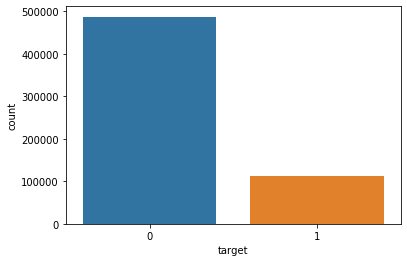

In [10]:
sns.countplot(x="target", data=train)

### 探索 'bin'特徵

In [11]:
for col in ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']:
    print(col)
    print(train[col].value_counts())

bin_0
0.0    528377
1.0     53729
Name: bin_0, dtype: int64
bin_1
0.0    474018
1.0    107979
Name: bin_1, dtype: int64
bin_2
0.0    419845
1.0    162225
Name: bin_2, dtype: int64
bin_3
F    366212
T    215774
Name: bin_3, dtype: int64
bin_4
N    312344
Y    269609
Name: bin_4, dtype: int64


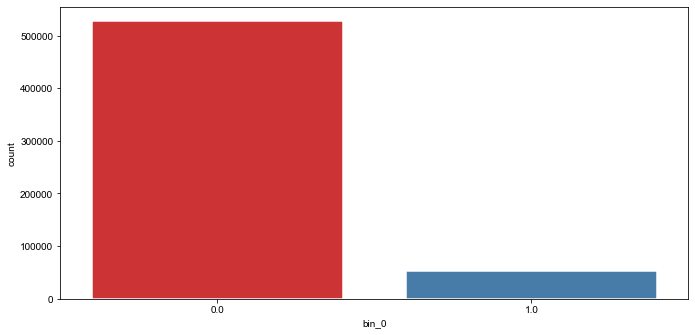

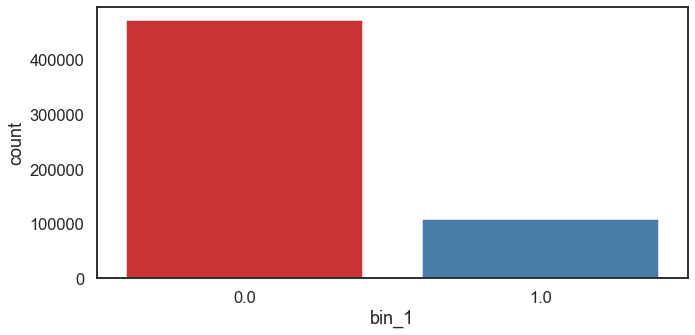

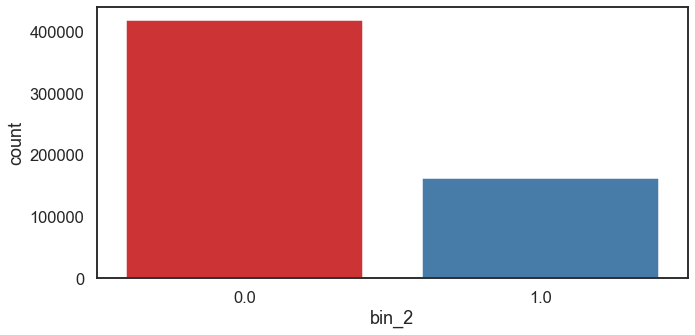

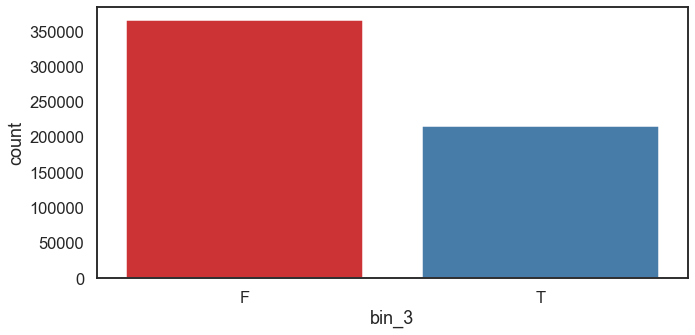

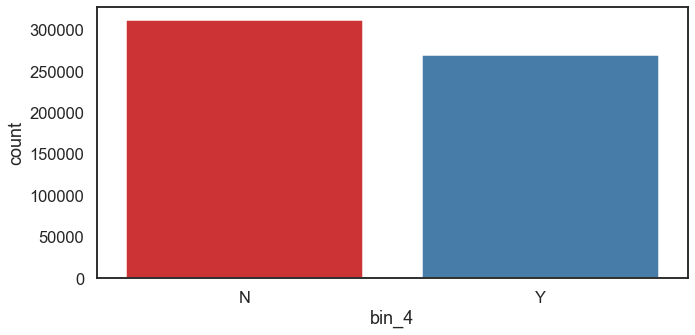

In [12]:
for col in ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']:
    
    f, ax = plt.subplots(1, 1, figsize=(10,5))
    
    sns.set(style="white", context="talk")
    
    sns.countplot(x=col, data=train, ax=ax, palette="Set1")
    f.tight_layout()

### 探索'bin'與目標(target)變量的特徵

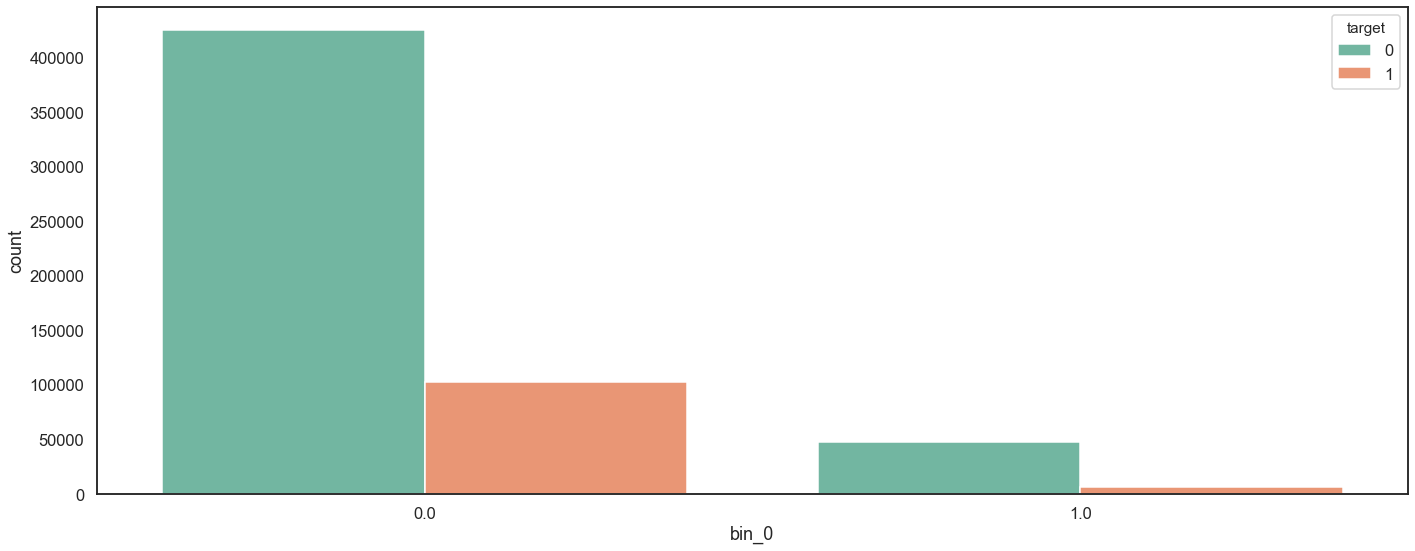

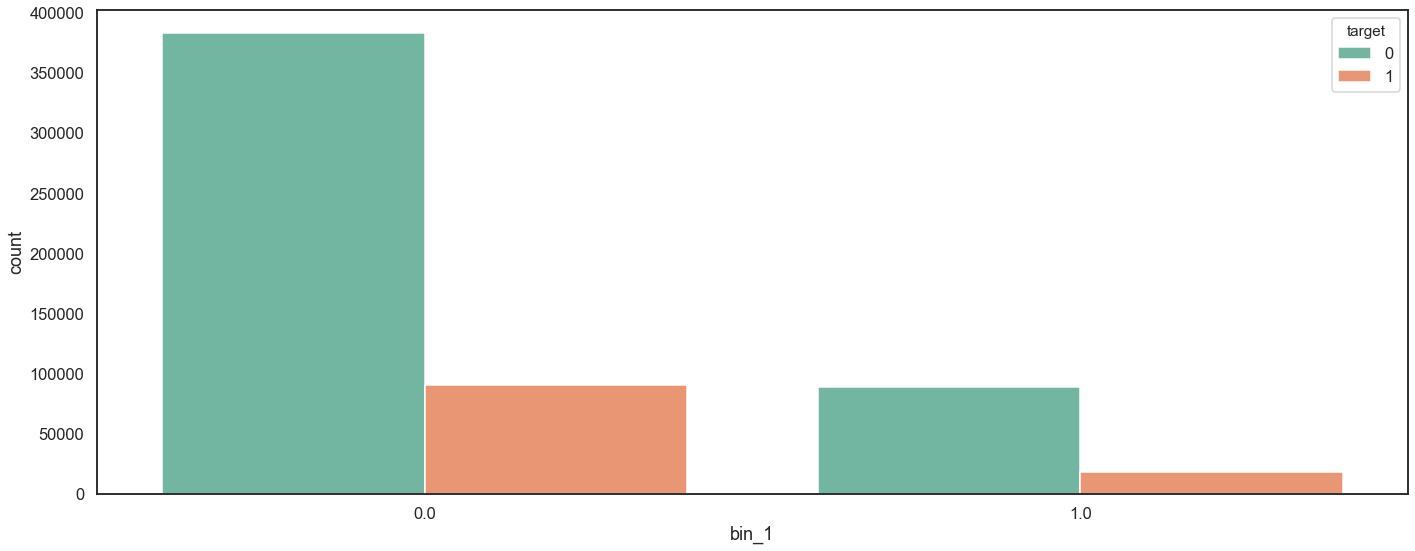

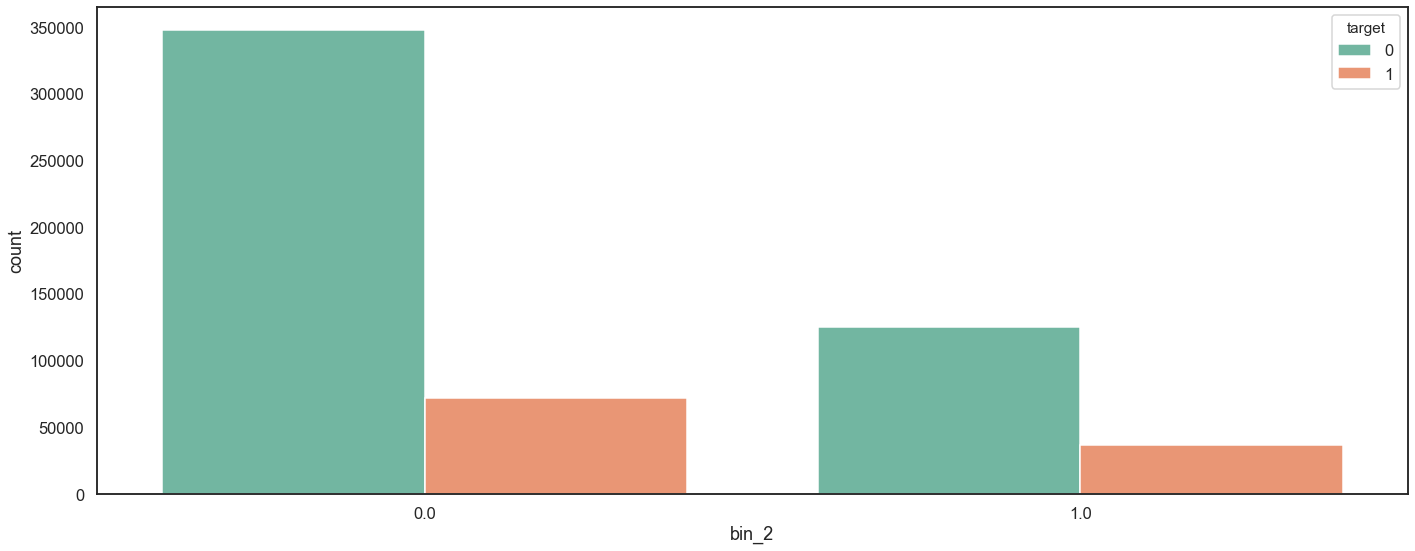

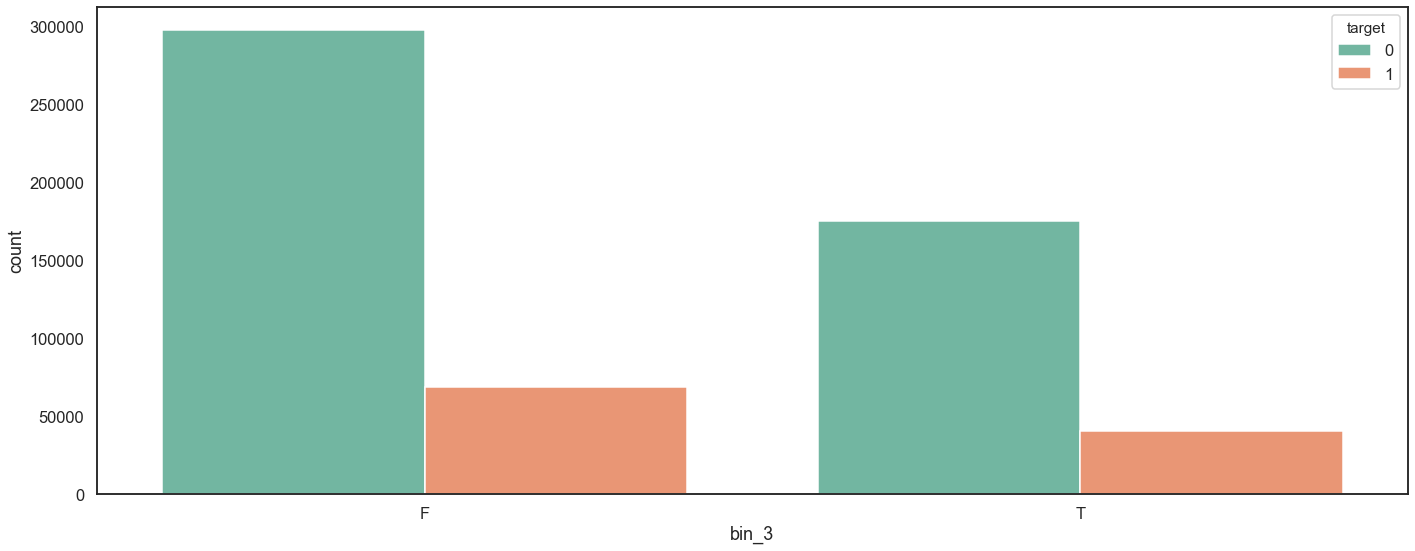

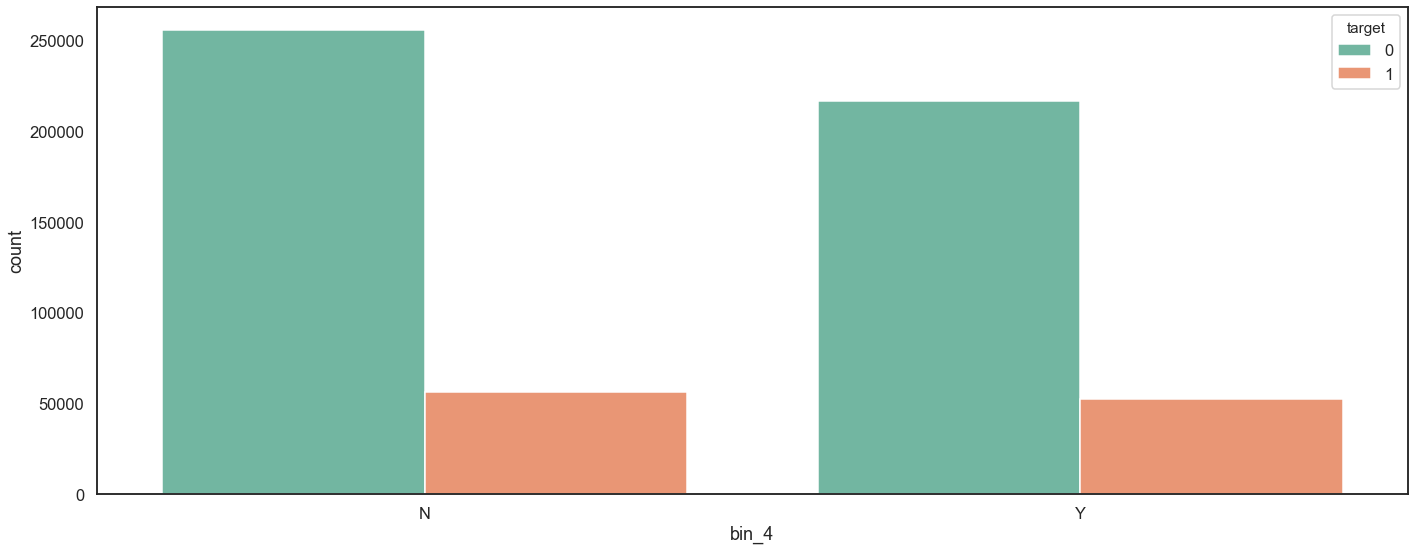

In [13]:
for col in ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']:
    
    f, ax = plt.subplots(1, 1, figsize=(20,8))
    
    sns.set(style="white", context="talk")
    
    sns.countplot(x=col, hue="target", data=train, ax=ax, palette="Set2")
    f.tight_layout()

### 探索'nom'特徵

In [14]:
for col in ['nom_0','nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6','nom_7', 'nom_8','nom_9']:
    print(col)
    print(train[col].value_counts())

nom_0
Red      323286
Blue     205861
Green     52601
Name: nom_0, dtype: int64
nom_1
Triangle     164190
Polygon      152563
Trapezoid    119438
Circle       104995
Square        26503
Star          14155
Name: nom_1, dtype: int64
nom_2
Hamster    164897
Axolotl    152319
Lion       119504
Dog        104825
Cat         26276
Snake       14144
Name: nom_2, dtype: int64
nom_3
India         164869
Costa Rica    151827
Russia        119840
Finland       104601
Canada         26425
China          14317
Name: nom_3, dtype: int64
nom_4
Theremin    308621
Bassoon     196639
Oboe         49996
Piano        26709
Name: nom_4, dtype: int64
nom_5
fc8fc7e56    977
360a16627    972
423976253    961
7917d446c    961
879c2ed83    960
            ... 
7335087fd      5
30019ce8a      3
b3ad70fcb      1
0385d0739      1
d6bb2181a      1
Name: nom_5, Length: 1220, dtype: int64
nom_6
ea8c5e181    805
9fa481341    798
2b94ada45    792
32e9bd1ff    788
b88220966    781
            ... 
f0732a795      4
3225

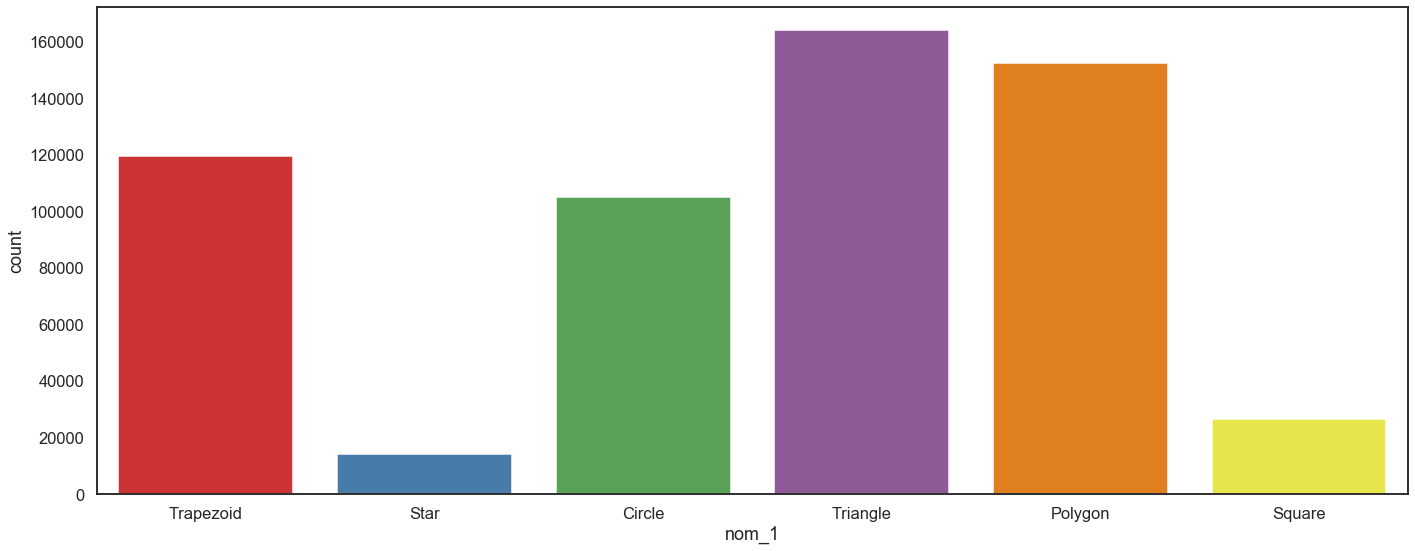

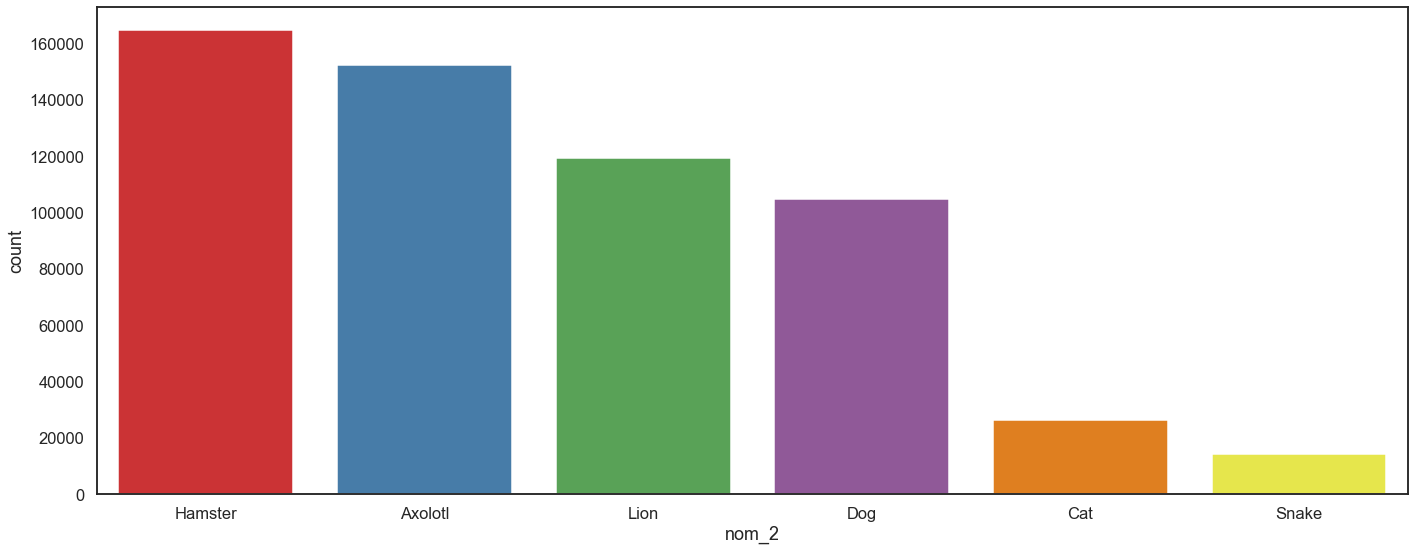

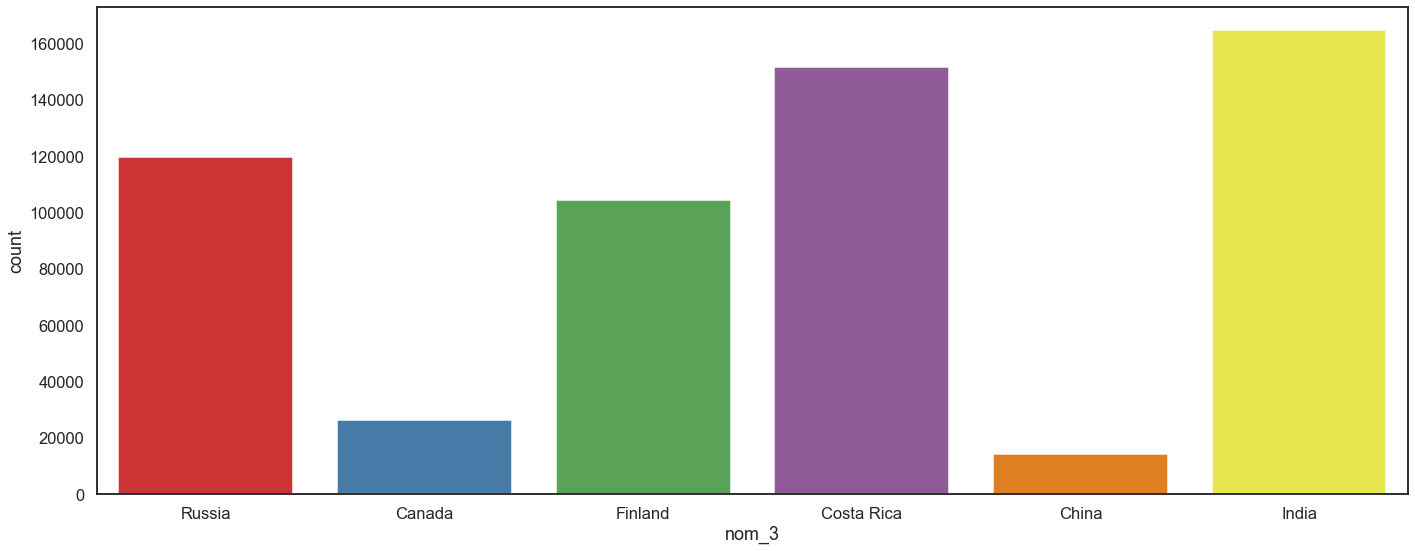

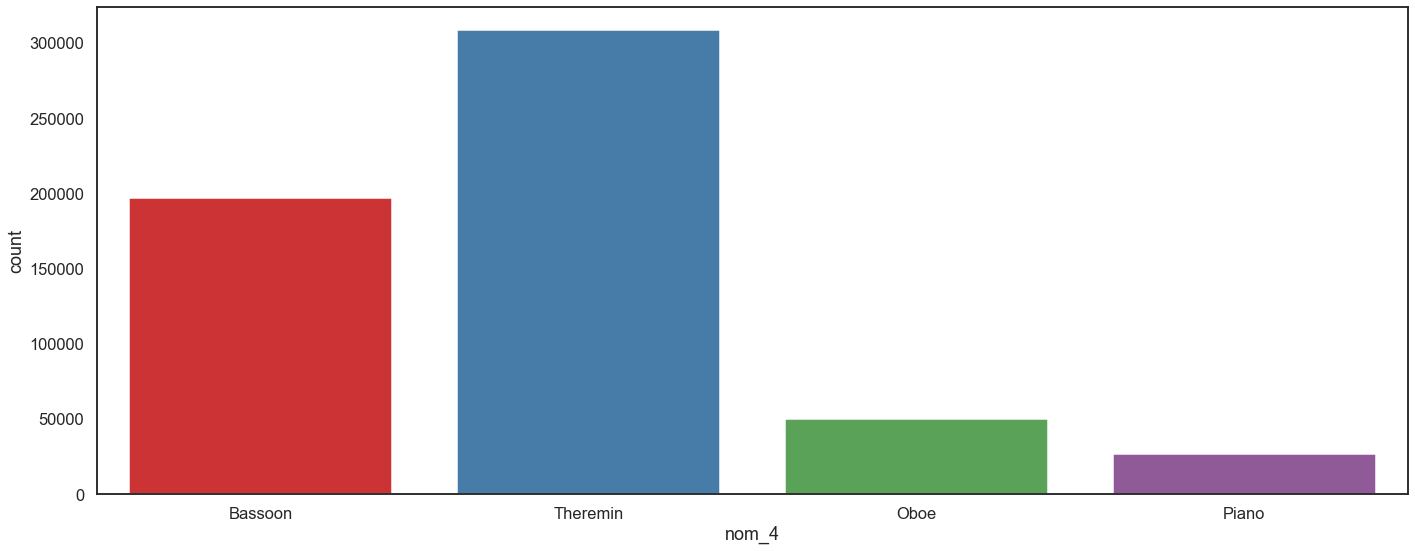

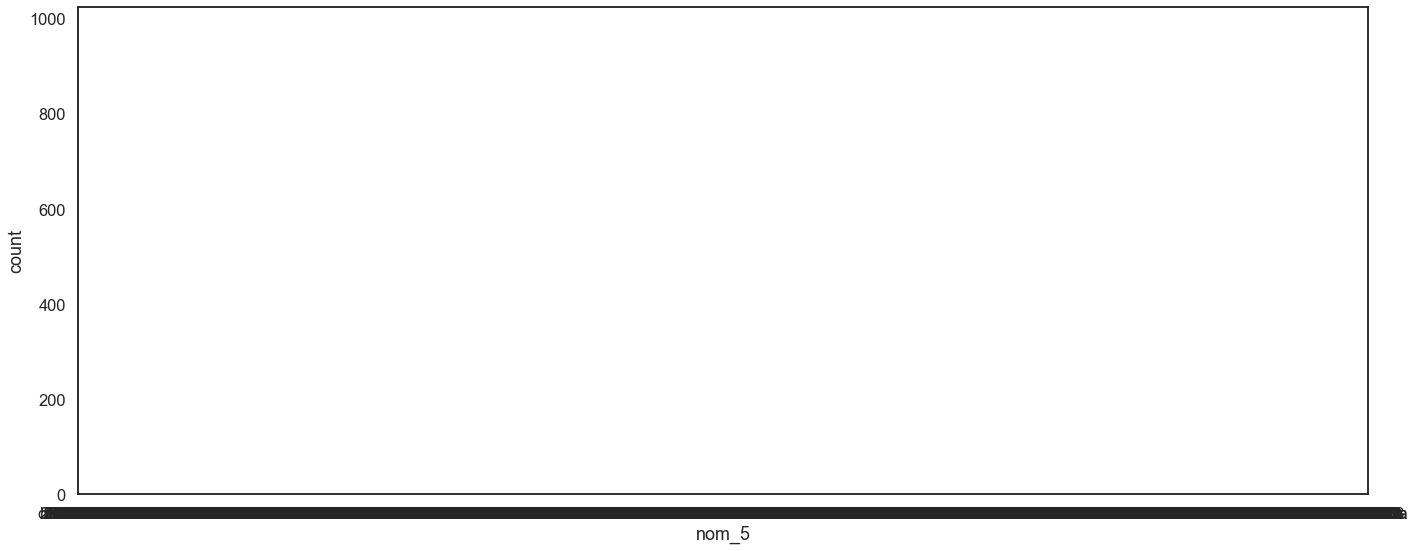

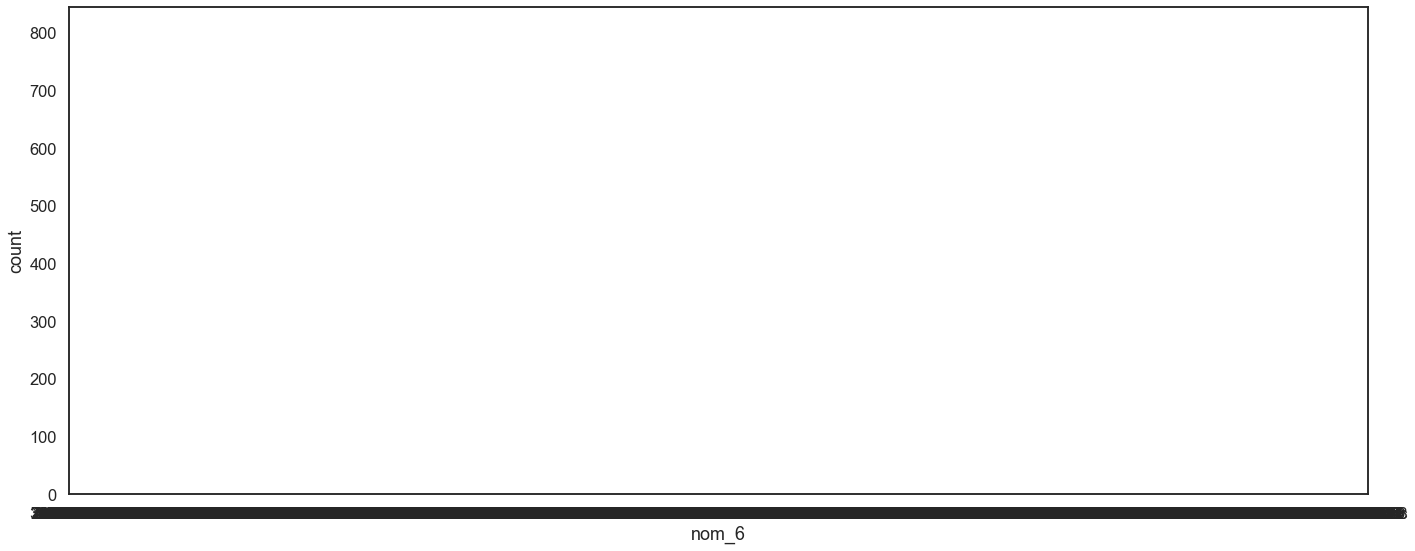

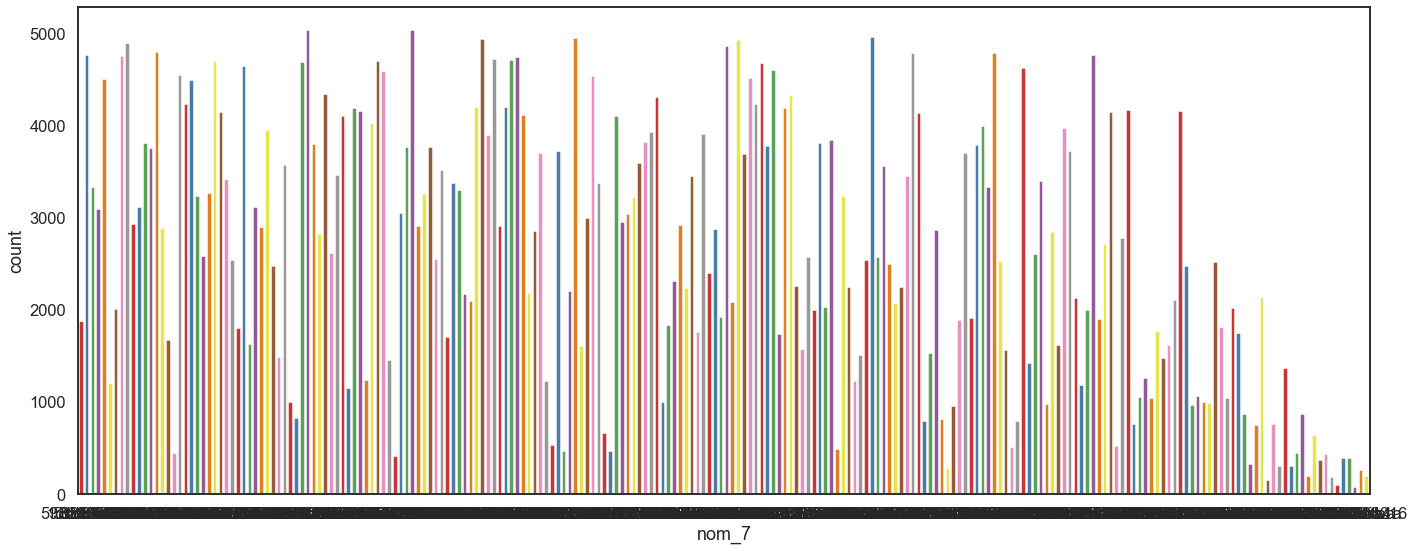

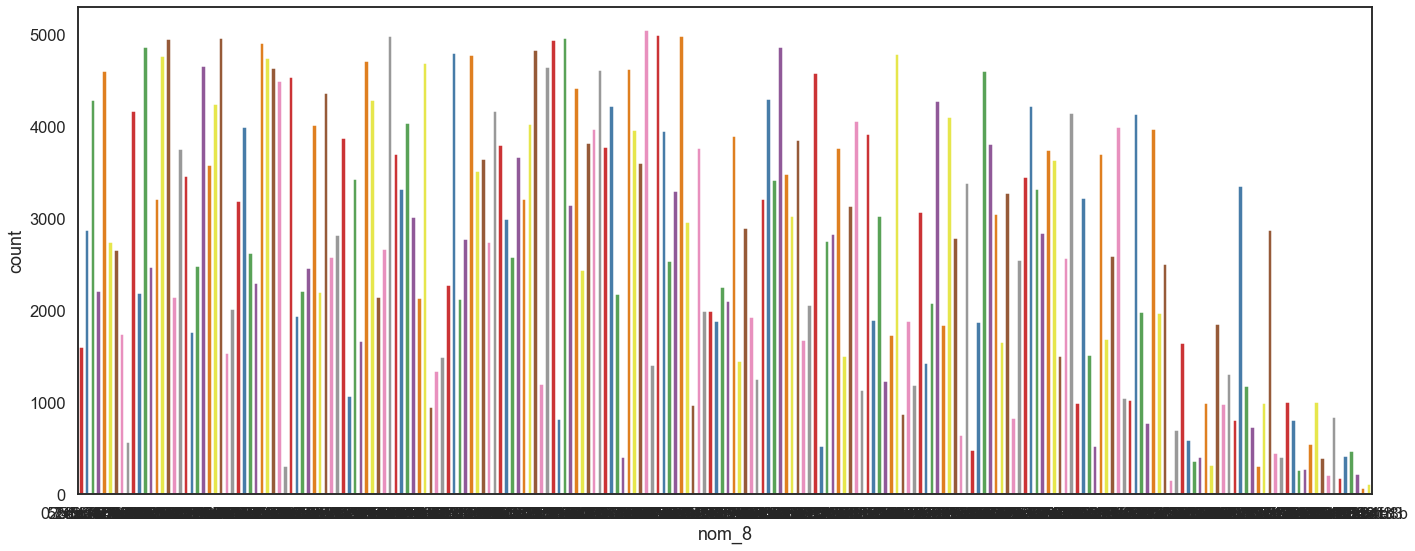

In [15]:
for col in ['nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8']:
    
    f, ax = plt.subplots(1, 1, figsize=(20,8))
    
    
    sns.countplot(x=col, data=train, ax=ax, palette="Set1")
    f.tight_layout()

### 探索'nom'與目標(target)變量的特徵

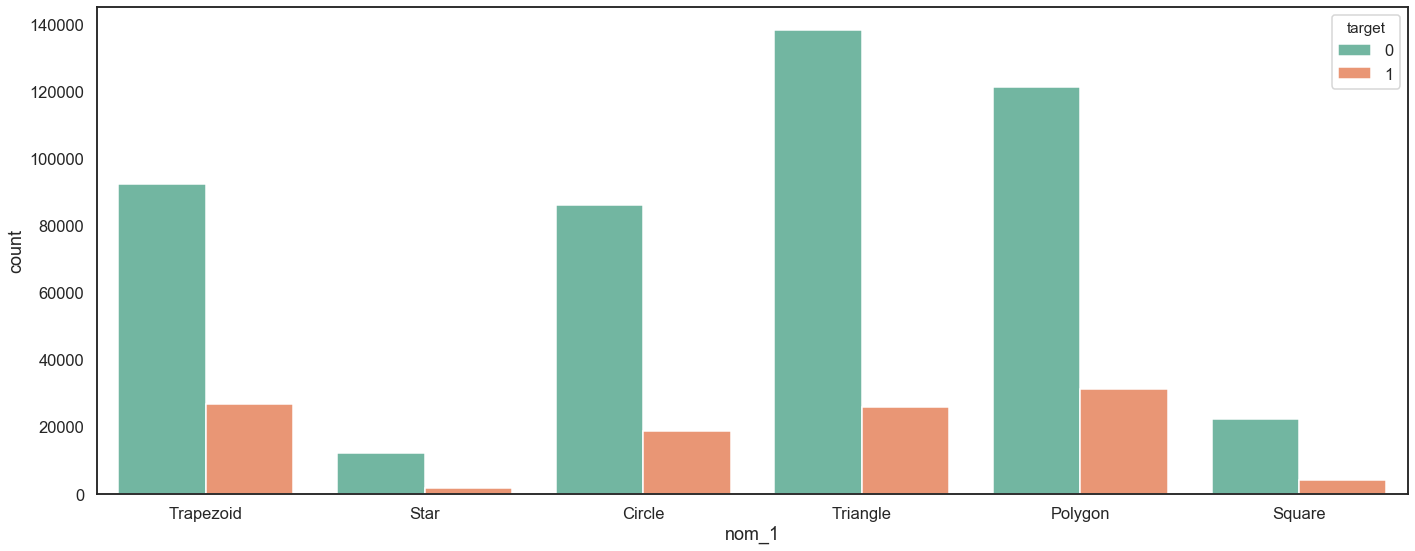

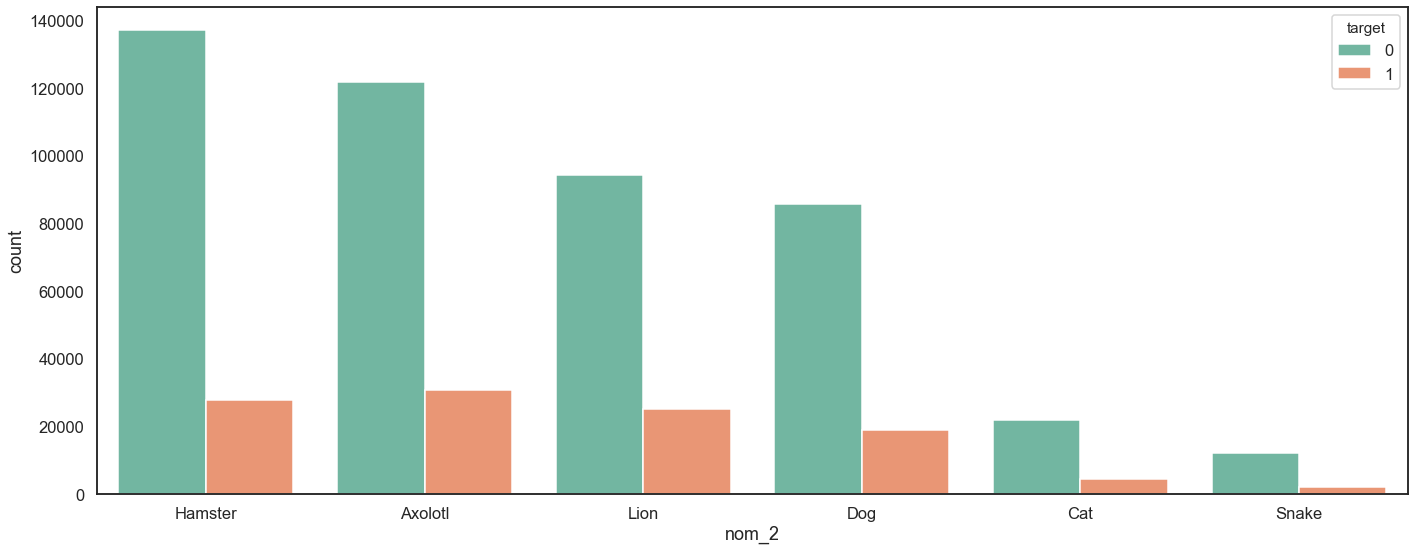

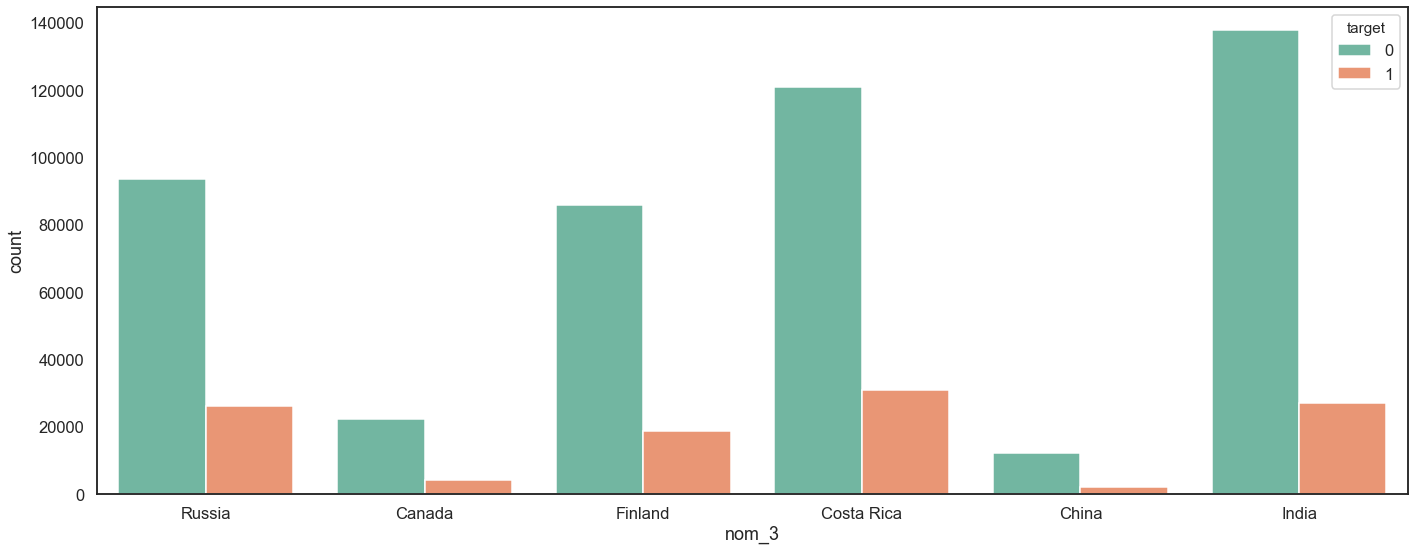

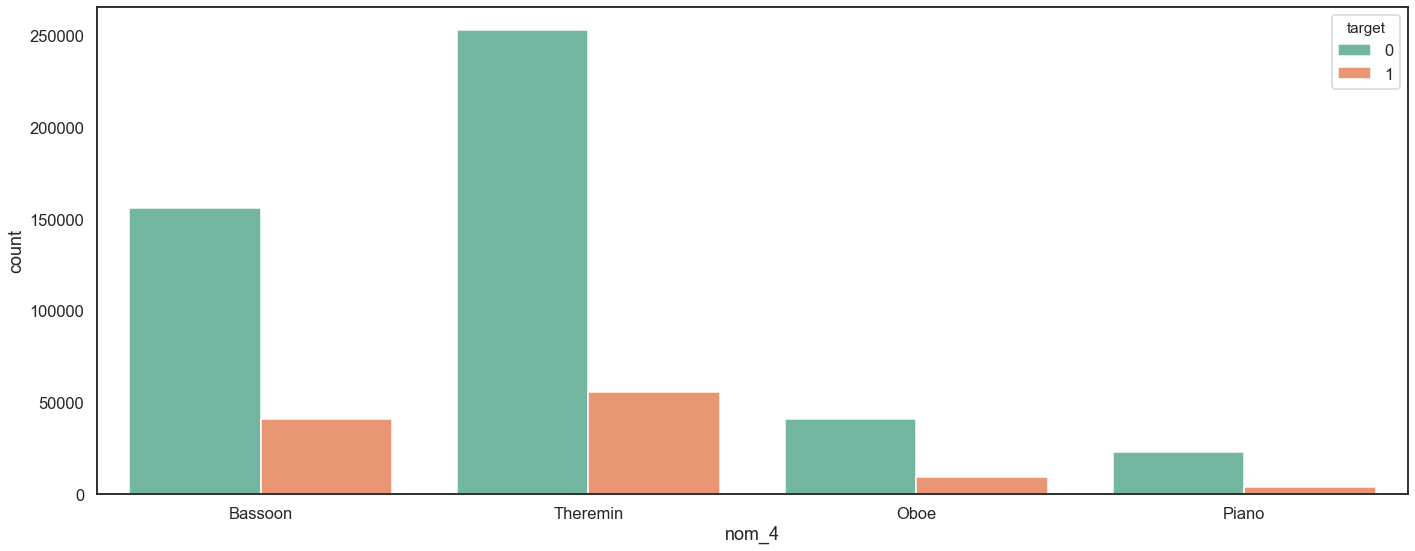

In [16]:
for col in ['nom_1', 'nom_2', 'nom_3', 'nom_4']:
    
    f, ax = plt.subplots(1, 1, figsize=(20,8))
    
    
    sns.countplot(x=col, hue="target", data=train, ax=ax, palette="Set2")
    f.tight_layout()

### 探索'ord'特徵

In [17]:
for col in ["ord_0", "ord_1", "ord_2", "ord_3", "ord_4", "ord_5"]:
    print(col)
    print(train[col].value_counts())

ord_0
1.0    227917
3.0    197798
2.0    155997
Name: ord_0, dtype: int64
ord_1
Novice         160597
Expert         139677
Contributor    109821
Grandmaster     95866
Master          75998
Name: ord_1, dtype: int64
ord_2
Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64
ord_3
n    70982
a    65321
m    57980
c    56675
h    55744
o    45464
b    44795
e    38904
k    38718
i    34763
d    30634
f    29450
g     6180
j     3639
l     2835
Name: ord_3, dtype: int64
ord_4
N    39978
P    37890
Y    36657
A    36633
R    33045
U    32897
M    32504
X    32347
C    32112
H    31189
Q    30145
T    29723
O    25610
B    25212
E    21871
K    21676
I    19805
D    17284
F    16721
W     8268
Z     5790
S     4595
G     3404
V     3107
J     1950
L     1657
Name: ord_4, dtype: int64
ord_5
Fl    10562
DN     9527
Sz     8654
RV     5648
oJ     5596
      ...  
vw      189
gV      124
vQ 

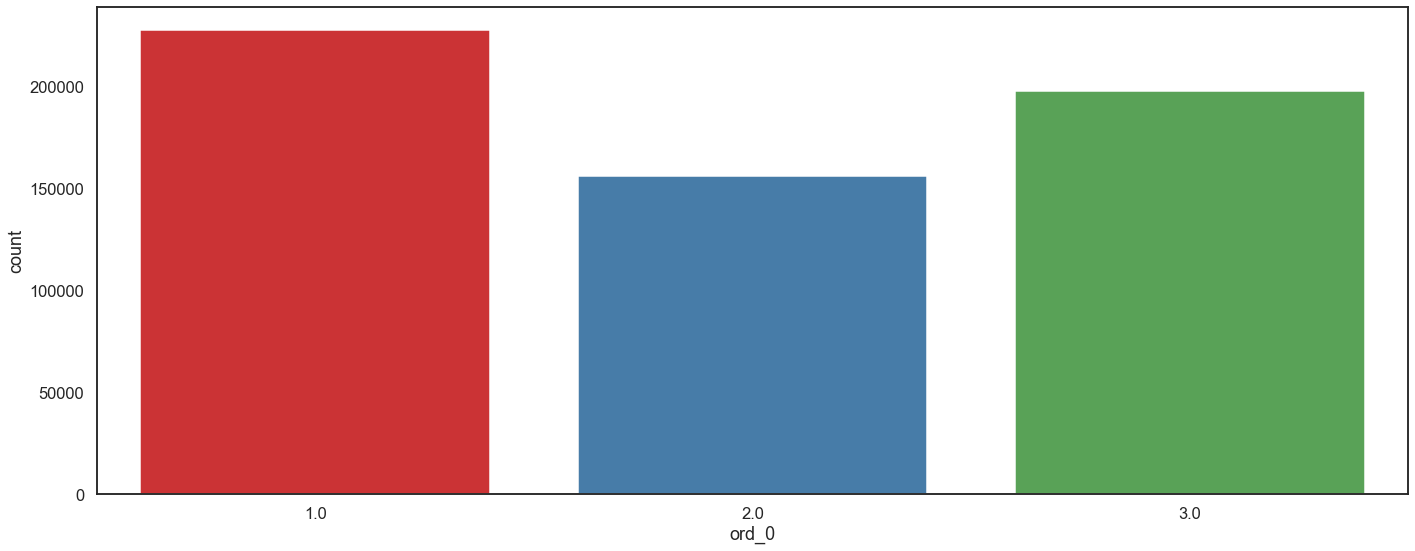

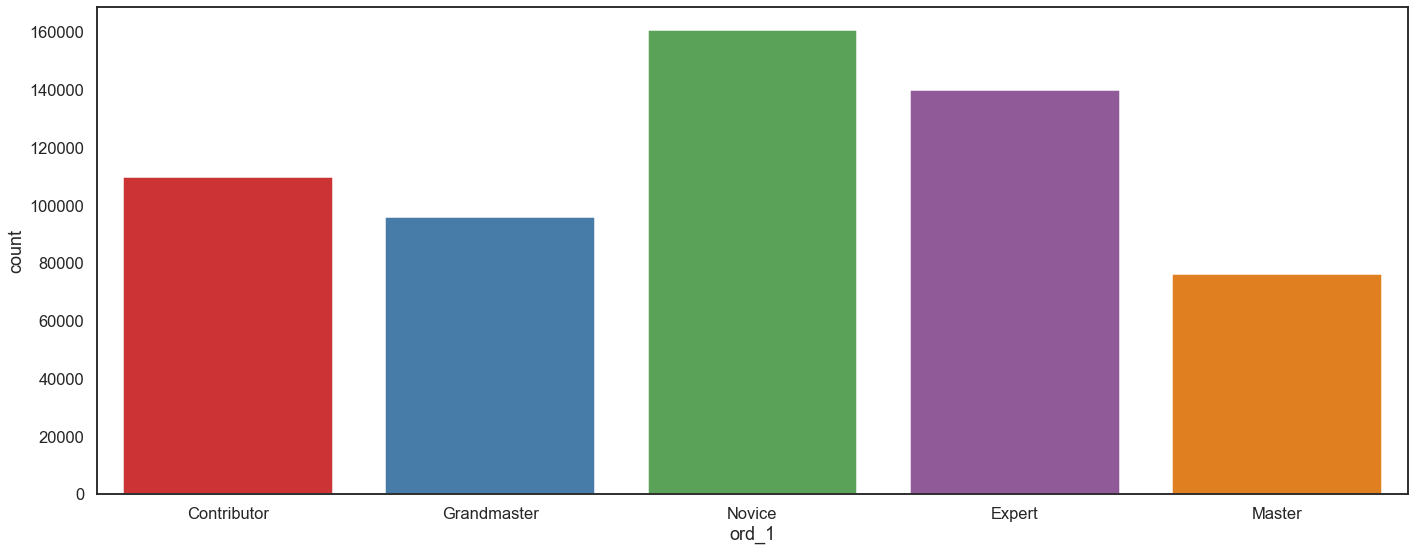

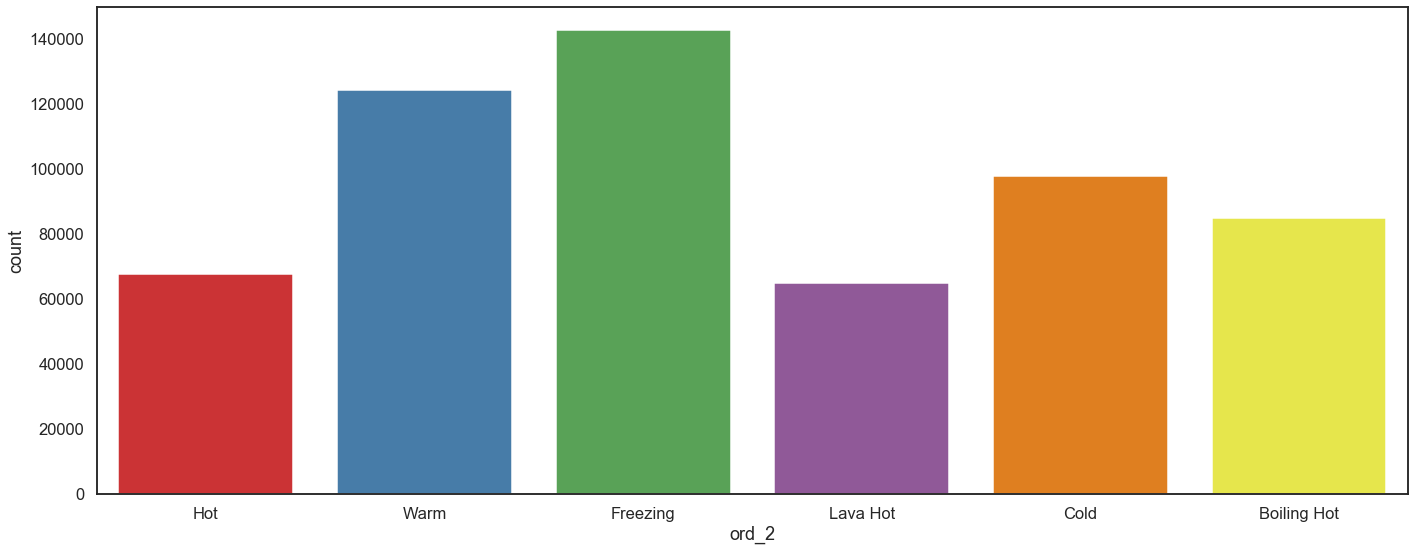

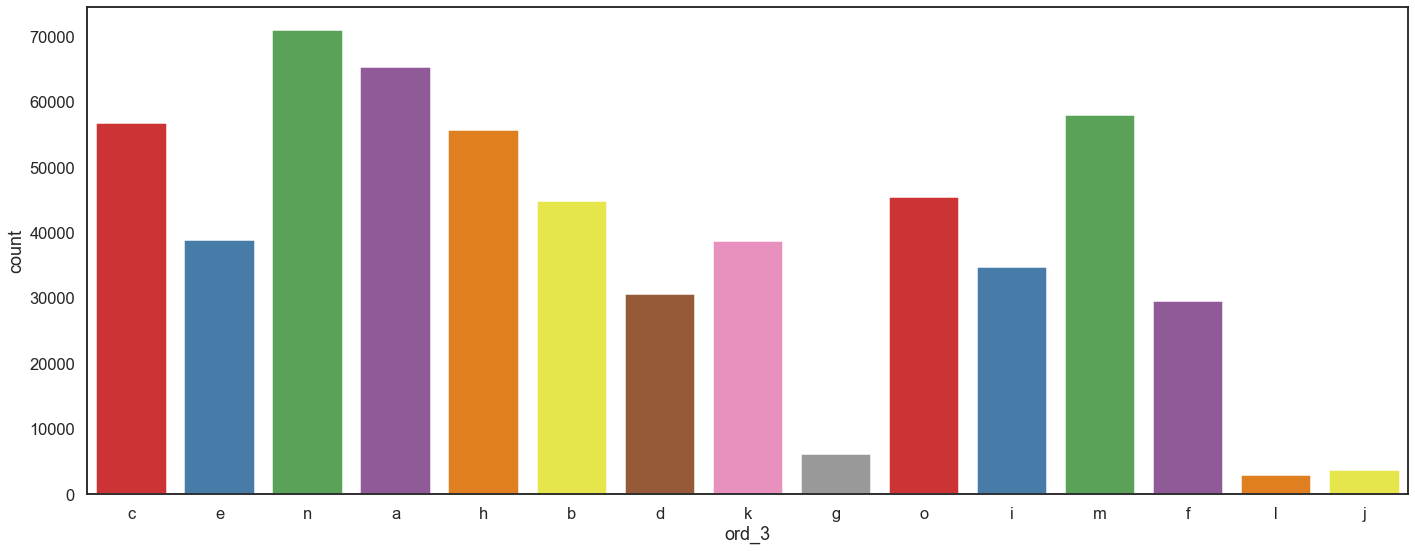

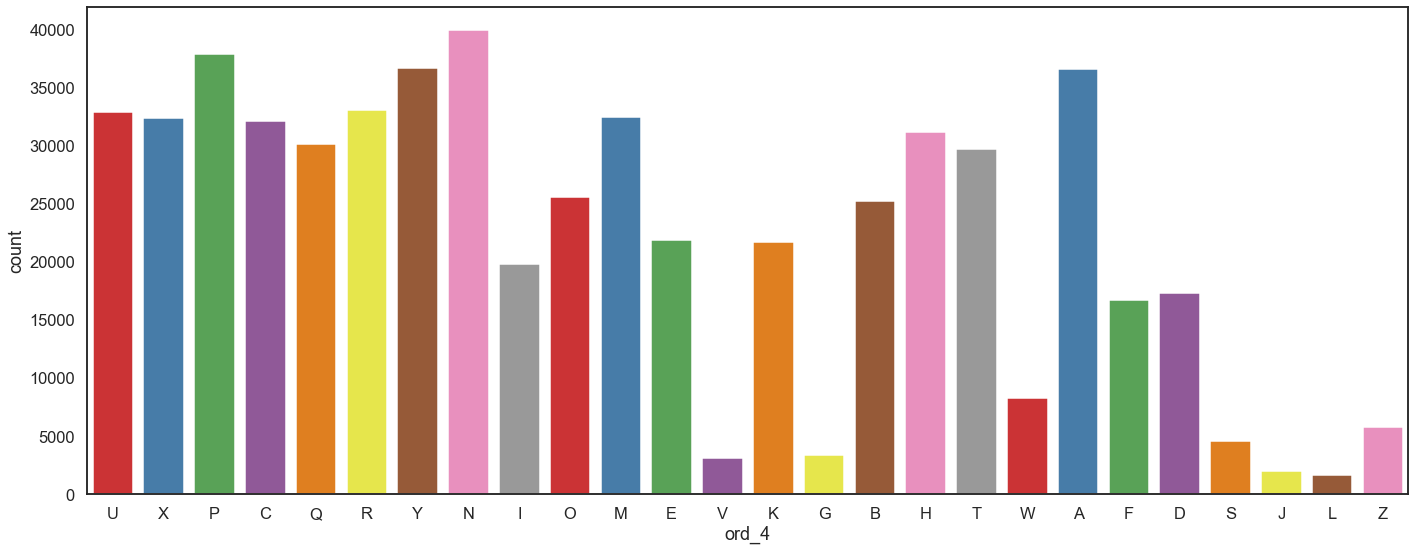

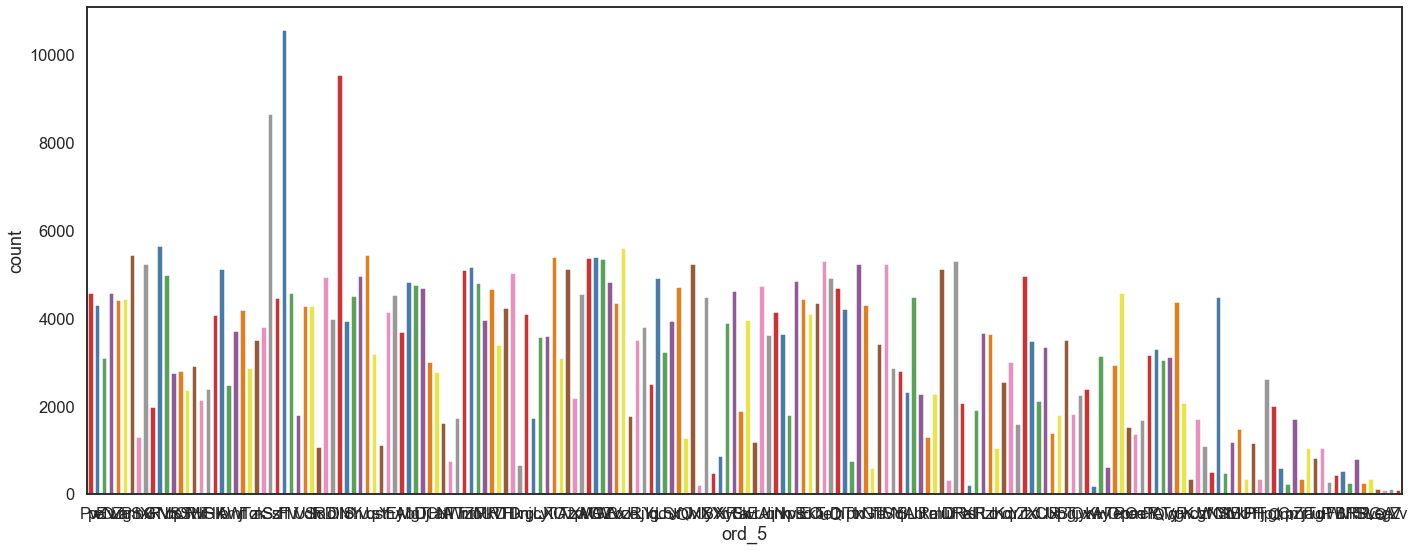

In [18]:
for col in ["ord_0", "ord_1", "ord_2", "ord_3", "ord_4", "ord_5"]:
    
    f, ax = plt.subplots(1, 1, figsize=(20,8))
    
    sns.countplot(x=col, data=train, ax=ax, palette="Set1")
    f.tight_layout()
    
import gc
gc.collect();

### 探索'ord'與目標(target)變量的特徵

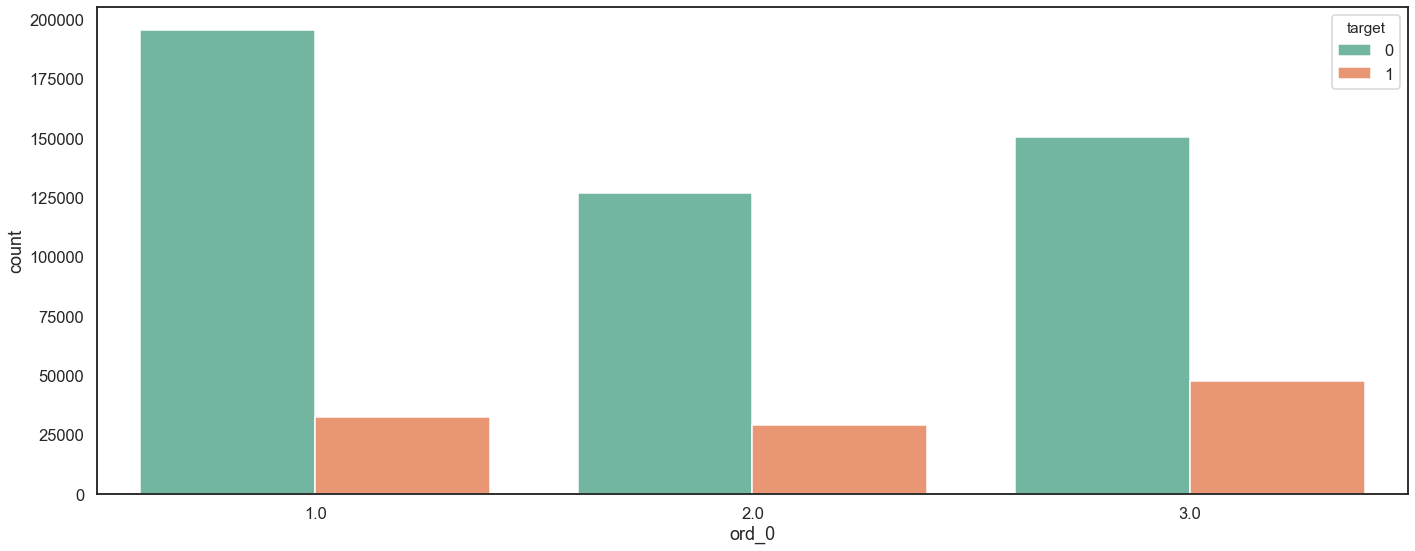

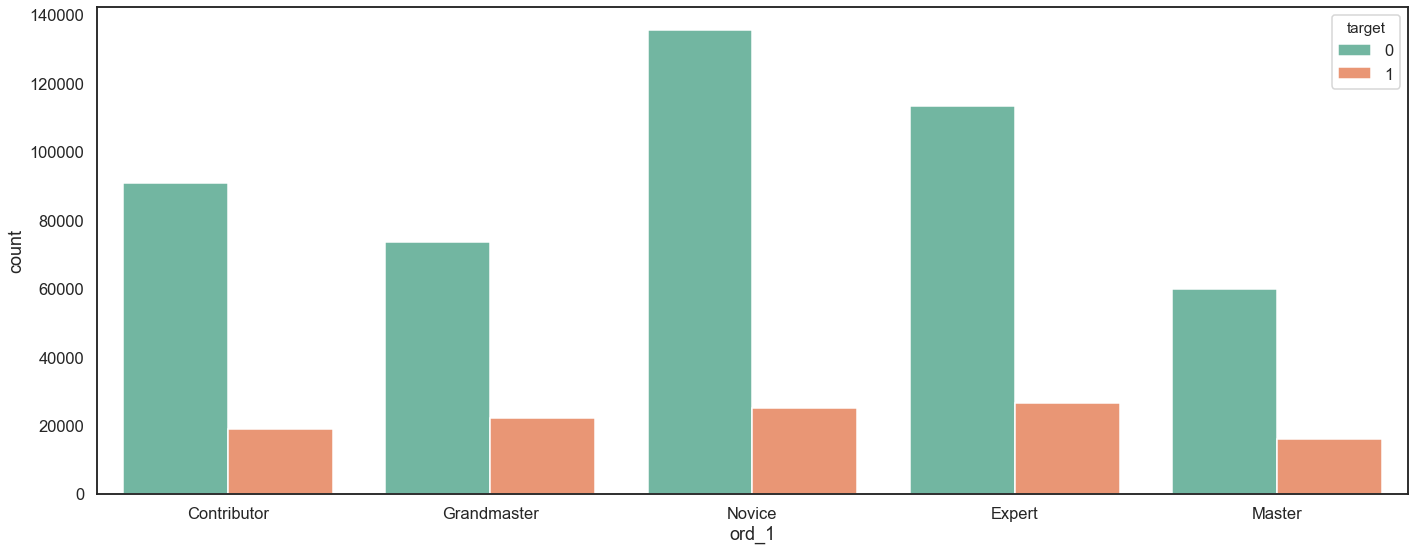

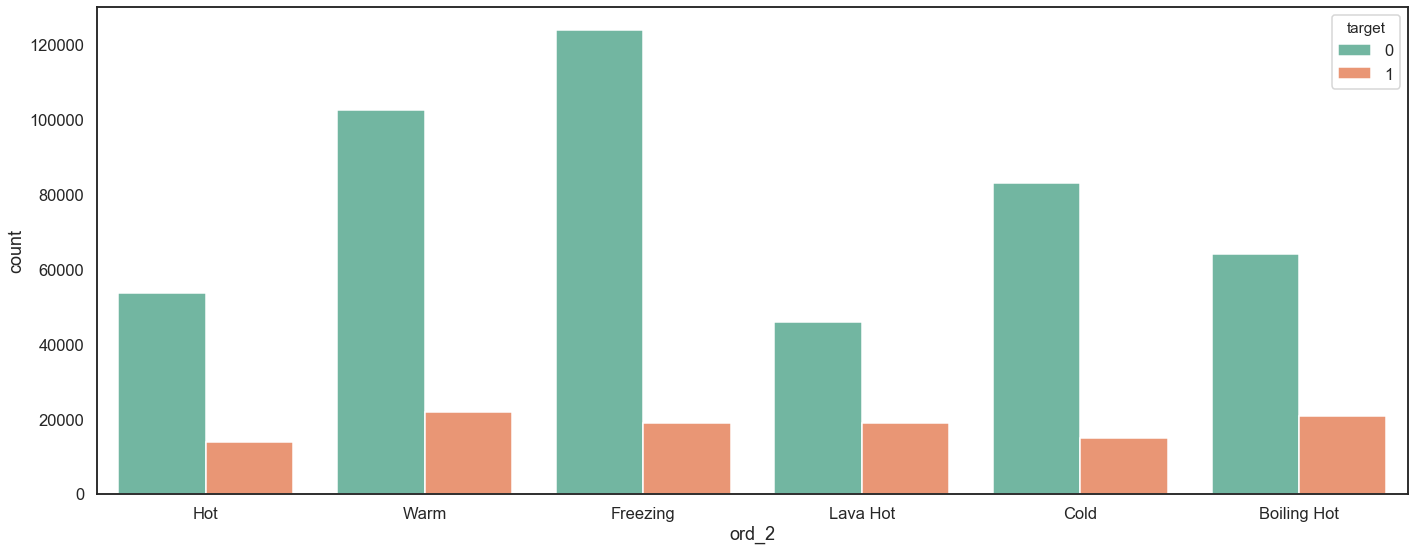

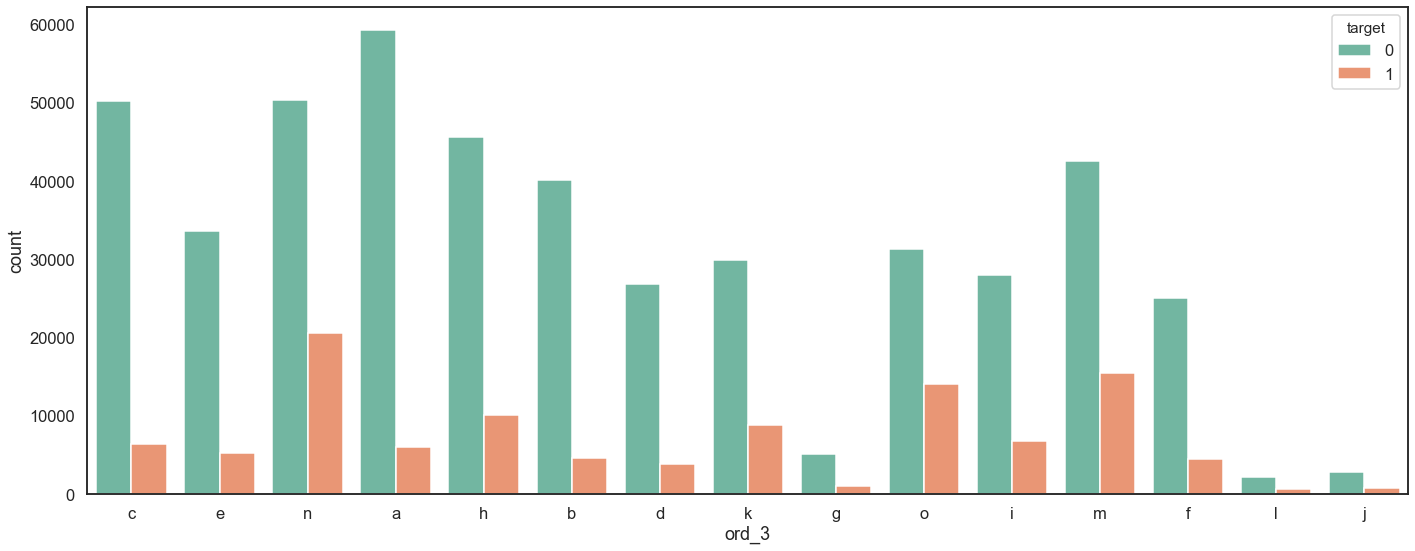

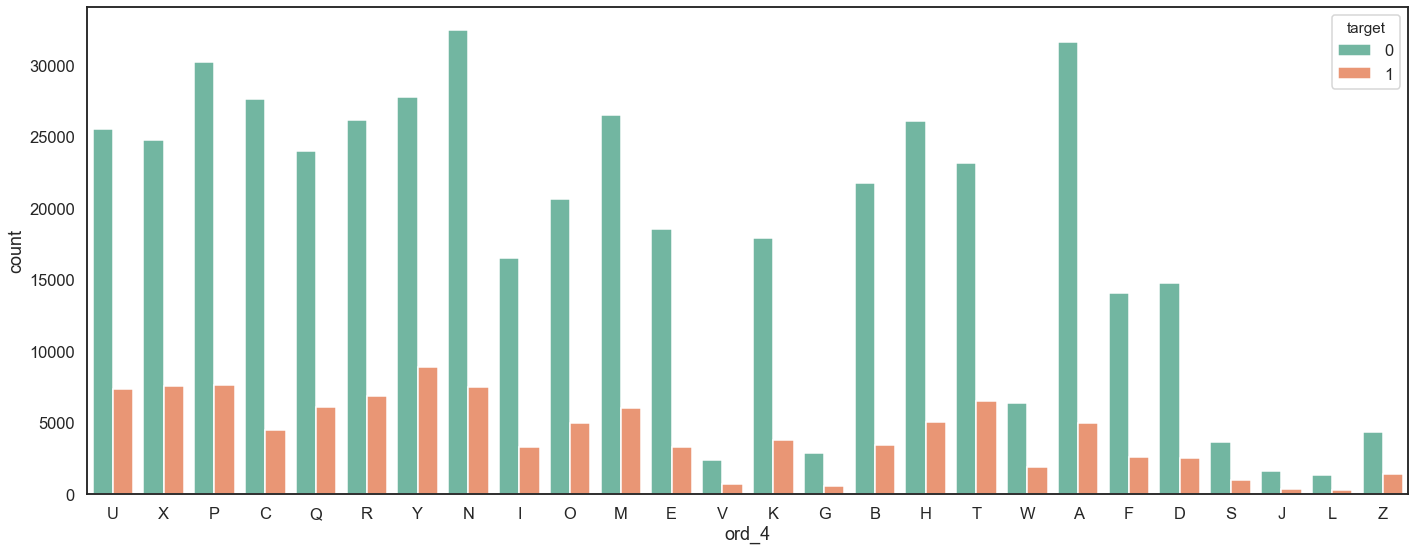

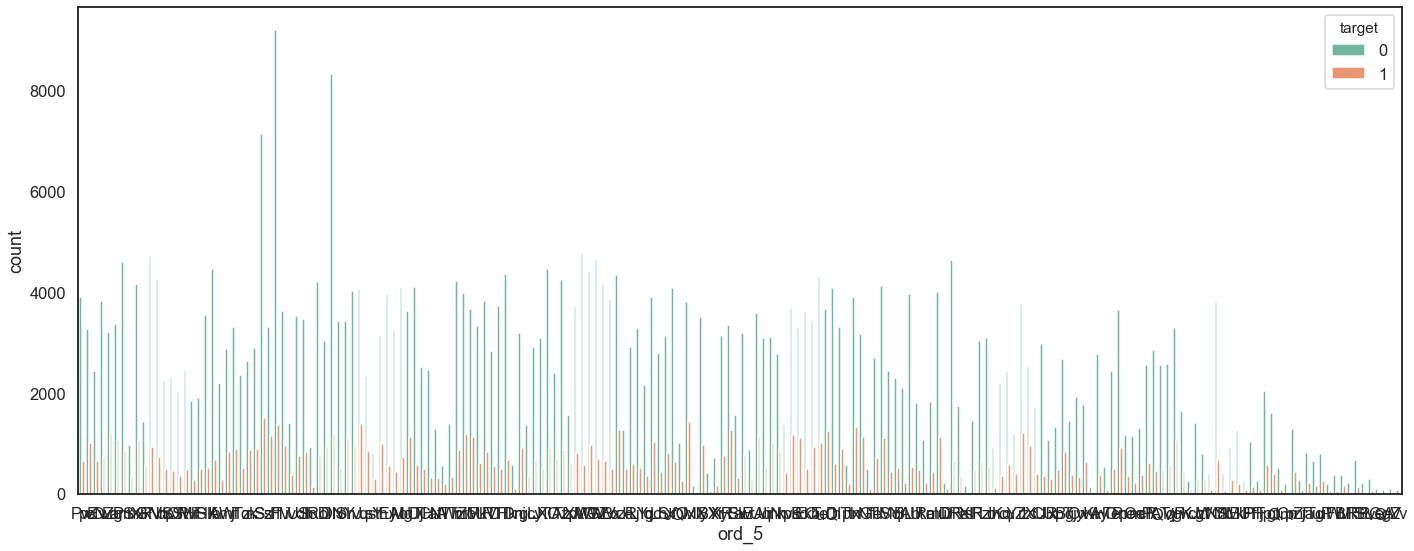

In [19]:
for col in ["ord_0", "ord_1", "ord_2", "ord_3", "ord_4", "ord_5"]:
    
    f, ax = plt.subplots(1, 1, figsize=(20,8))
    
    sns.countplot(x=col, hue="target", data=train, ax=ax, palette="Set2")
    f.tight_layout()
    
import gc
gc.collect();

### 刪除nom_5-nom_9之值
因屬於 序數特徵 <br>
且不重複值高達 2000多種值 <br>
故在此研究把nom_5至nom_9之data刪除，降低數據的雜訊

In [20]:
train= train.drop(['nom_5'], axis=1)
train= train.drop(['nom_6'], axis=1)
train= train.drop(['nom_7'], axis=1)
train= train.drop(['nom_8'], axis=1)
train= train.drop(['nom_9'], axis=1)

In [21]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


## 數據清理NULL值

In [22]:
train_1=train

### 刪除null值列

In [23]:
train_1=train_1.dropna(axis=0,how='any')

In [24]:
train_1.isna().sum()

id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

In [25]:
train_1.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,Bassoon,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,Bassoon,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,Oboe,1.0,Novice,Boiling Hot,c,N,mX,6.0,3.0,0
10,10,0.0,0.0,1.0,T,Y,Blue,Triangle,Hamster,Finland,Bassoon,1.0,Novice,Hot,b,O,hG,7.0,5.0,1


In [26]:
train_1.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4',
       'ord_5', 'day', 'month', 'target'],
      dtype='object')

In [27]:
title= train_1.columns

In [28]:
for i in range(0,20):
    print(title[i])

id
bin_0
bin_1
bin_2
bin_3
bin_4
nom_0
nom_1
nom_2
nom_3
nom_4
ord_0
ord_1
ord_2
ord_3
ord_4
ord_5
day
month
target


In [29]:
for i in range(0,20):
    print(title[i],'not repeating amount :', str(train_1[title[i]].nunique()))

id not repeating amount : 346905
bin_0 not repeating amount : 2
bin_1 not repeating amount : 2
bin_2 not repeating amount : 2
bin_3 not repeating amount : 2
bin_4 not repeating amount : 2
nom_0 not repeating amount : 3
nom_1 not repeating amount : 6
nom_2 not repeating amount : 6
nom_3 not repeating amount : 6
nom_4 not repeating amount : 4
ord_0 not repeating amount : 3
ord_1 not repeating amount : 5
ord_2 not repeating amount : 6
ord_3 not repeating amount : 15
ord_4 not repeating amount : 26
ord_5 not repeating amount : 190
day not repeating amount : 7
month not repeating amount : 12
target not repeating amount : 2


In [30]:
train_1.dtypes

id          int64
bin_0     float64
bin_1     float64
bin_2     float64
bin_3      object
bin_4      object
nom_0      object
nom_1      object
nom_2      object
nom_3      object
nom_4      object
ord_0     float64
ord_1      object
ord_2      object
ord_3      object
ord_4      object
ord_5      object
day       float64
month     float64
target      int64
dtype: object

In [31]:
train_1.shape

(346905, 20)

## 特徵工程

### 自行編輯資數據 手動數據 to 數字

In [32]:
train.loc[train['bin_3'] == 'T', 'bin_3'] = 1
train.loc[train['bin_3'] == 'F', 'bin_3'] = 0

train.loc[train['bin_4'] == 'Y', 'bin_4'] = 1
train.loc[train['bin_4'] == 'N', 'bin_4'] = 0


### one-hot-encoding 自動數據 to 數字

In [33]:
from sklearn.preprocessing import LabelEncoder

for i in ['bin_3','bin_4','nom_0','nom_1','nom_2','nom_3','nom_4','ord_1','ord_2','ord_3','ord_4','ord_5']:
    print(i , "one-hot-encoding")
    
    le = LabelEncoder()
    le.fit(train_1[i].to_list())
    train_1[i]= le.transform(train_1[i])

bin_3 one-hot-encoding
bin_4 one-hot-encoding


C:\Users\HsiaoChiaoYu\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


nom_0 one-hot-encoding
nom_1 one-hot-encoding
nom_2 one-hot-encoding
nom_3 one-hot-encoding
nom_4 one-hot-encoding
ord_1 one-hot-encoding
ord_2 one-hot-encoding
ord_3 one-hot-encoding
ord_4 one-hot-encoding
ord_5 one-hot-encoding


In [34]:
train_1.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,0,0,2,4,3,5,0,3.0,0,3,2,20,56,6.0,3.0,0
6,6,0.0,0.0,0.0,0,0,2,5,3,2,0,1.0,2,1,2,17,158,5.0,6.0,0
7,7,0.0,0.0,1.0,1,0,2,5,0,3,0,3.0,1,1,1,24,54,1.0,1.0,0
8,8,0.0,0.0,0.0,0,0,0,1,3,5,1,1.0,4,0,2,13,136,6.0,3.0,0
10,10,0.0,0.0,1.0,1,1,0,5,3,3,0,1.0,4,3,1,14,117,7.0,5.0,1


In [35]:
train_1['bin_3']

0         0
6         0
7         1
8         0
10        1
         ..
599991    1
599992    1
599993    0
599997    0
599999    1
Name: bin_3, Length: 346905, dtype: int32

In [36]:
train_1.shape

(346905, 20)

## 相關係數分析

### 相關係數

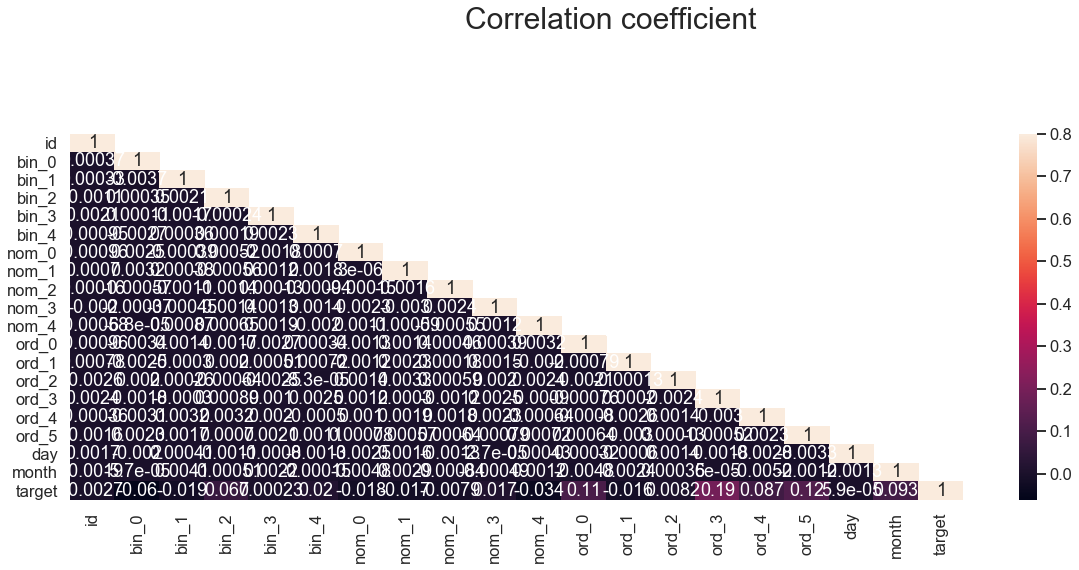

In [37]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Correlation coefficient", fontsize=30)
fig.subplots_adjust(top=0.76) 
corrcoef = train_1.corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
# sns.heatmap(corrcoef, mask=mask, vmax=.8, square=True, annot=True, ax=ax)
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

#### 可以發現 數據對於target 的相關係數非常低

## 迴歸績效評估

### 刪除目標特徵(target)

In [38]:
df_y= train_1['target']
train_1=train_1.drop(['target'],axis=1)

### 數據分割-建立test & train 

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_1, df_y, test_size=0.2, random_state=42)

print("Training set: data:{} and target:{}".format(X_train.shape,y_train.shape),
             "Testing set: data:{} and target:{}".format(X_test.shape,y_test.shape))

Training set: data:(277524, 19) and target:(277524,) Testing set: data:(69381, 19) and target:(69381,)


## p-value 分析

In [40]:
from scipy import stats
for i in range(0,19):
    tValue, pValue = stats.ttest_ind(train_1.all(), df_y, equal_var=True)
    if pValue < 0.05:
        print(title[i]+"p value is "+str(np.round(pValue,3)), "Reject 'The difference is NOT significant.'")
    else:
        print(title[i]+"p value is "+str(np.round(pValue,3)), "Can not reject 'The difference is NOT significant.'")

idp value is 0.74 Can not reject 'The difference is NOT significant.'
bin_0p value is 0.74 Can not reject 'The difference is NOT significant.'
bin_1p value is 0.74 Can not reject 'The difference is NOT significant.'
bin_2p value is 0.74 Can not reject 'The difference is NOT significant.'
bin_3p value is 0.74 Can not reject 'The difference is NOT significant.'
bin_4p value is 0.74 Can not reject 'The difference is NOT significant.'
nom_0p value is 0.74 Can not reject 'The difference is NOT significant.'
nom_1p value is 0.74 Can not reject 'The difference is NOT significant.'
nom_2p value is 0.74 Can not reject 'The difference is NOT significant.'
nom_3p value is 0.74 Can not reject 'The difference is NOT significant.'
nom_4p value is 0.74 Can not reject 'The difference is NOT significant.'
ord_0p value is 0.74 Can not reject 'The difference is NOT significant.'
ord_1p value is 0.74 Can not reject 'The difference is NOT significant.'
ord_2p value is 0.74 Can not reject 'The difference is

p-value值均為0.74 不列入考慮

#### 迴歸係數評估

In [41]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.09352540083900385

可以發現 score 為0.0935 成效非常差<br>
可以藉由數值間相關性較低來解釋

### 取 相關係數較高值 進行迴歸分析

In [42]:
train_2 =train_1

In [43]:
train_2=train_2.drop(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4',  'ord_1', 'ord_2', 'day'],axis=1)

In [44]:
train_2.head()

,ord_0,ord_3,ord_4,ord_5,month
0,3.0,2,20,56,3.0
6,1.0,2,17,158,6.0
7,3.0,1,24,54,1.0
8,1.0,2,13,136,3.0
10,1.0,1,14,117,5.0


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_2, df_y, test_size=0.2, random_state=42)

print("Training set: data:{} and target:{}".format(X_train.shape,y_train.shape),
             "Testing set: data:{} and target:{}".format(X_test.shape,y_test.shape))

Training set: data:(277524, 5) and target:(277524,) Testing set: data:(69381, 5) and target:(69381,)


In [46]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.08223006779195952

藉由最後的 score 可發現<br>
即使只提取相關係數較高之數據進行迴歸分析<br>
但score還是不盡理想

## 數據歸一化-train_1

In [47]:
train_1.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4',
       'ord_5', 'day', 'month'],
      dtype='object')

In [48]:
train_1=train_1.drop(['id'],axis=1)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_1)
train_MinMax=pd.DataFrame(scaler.transform(train_1))

In [50]:
from sklearn.model_selection import train_test_split

x, x_val, y, y_val = train_test_split(train_MinMax, df_y, random_state=42)

## 隨機森林預測-train_1

In [51]:
x_val.shape

(86727, 18)

In [52]:
y_val.shape

(86727,)

In [53]:
from sklearn.svm import SVC # support Vecter Machine

In [54]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

RC = RandomForestClassifier()
RC.fit(x, y)

print("Test set accuracy: {:.6f}".format(RC.score(x_val, y_val)))

# 嘗試預測 x, y

expected = y_val
predicted = RC.predict(x_val)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

Test set accuracy: 0.814717
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     70281
           1       0.58      0.08      0.14     16446

    accuracy                           0.81     86727
   macro avg       0.70      0.53      0.52     86727
weighted avg       0.78      0.81      0.75     86727

[[69354   927]
 [15142  1304]]


### 隨機森林-train_2

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_2)
train_MinMax=pd.DataFrame(scaler.transform(train_2))

from sklearn.model_selection import train_test_split

x, x_val, y, y_val = train_test_split(train_MinMax, df_y, random_state=42)

In [56]:
x_val.shape

(86727, 5)

In [57]:
y_val.shape

(86727,)

In [58]:
## 隨機森林預測
from sklearn.svm import SVC # support Vecter Machine

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

RC = RandomForestClassifier()
RC.fit(x, y)

print("Test set accuracy: {:.6f}".format(RC.score(x_val, y_val)))


Test set accuracy: 0.769518


In [59]:
# 嘗試預測 x, y
expected = y_val
predicted = RC.predict(x_val)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86     70281
           1       0.31      0.18      0.23     16446

    accuracy                           0.77     86727
   macro avg       0.57      0.54      0.55     86727
weighted avg       0.73      0.77      0.74     86727

[[63808  6473]
 [13516  2930]]


#### 結果顯示 train_1 預測score為0.8146，train_2 score 為0.7695
#### 選取較佳 結果為 train_1之隨機森林預測